In [122]:
import TFANN
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
import sklearn.preprocessing as sk
from TFANN import ANNR

In [26]:
data_set = pd.read_csv(r'C:\Users\AdityaAgarwal\market.csv')
data_set.head()

,Unnamed: 0,Symbol,Series,Date,Date Value,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,WIPRO,EQ,20-Apr-20,43941.0,187.00,189.00,189.0,180.15,180.55,181.10,183.33,8101663,1.485310e+09,79381,3735374,46.11
1,1,WIPRO,EQ,21-Apr-20,43942.0,181.10,179.00,179.9,173.80,178.30,178.05,176.98,9043319,1.600480e+09,75722,3454927,38.2
2,2,WIPRO,EQ,22-Apr-20,43943.0,178.05,177.00,179.5,175.05,178.30,178.55,177.59,5311640,9.432809e+08,62150,2169513,40.84
3,3,WIPRO,EQ,23-Apr-20,43944.0,178.55,179.40,182.6,177.10,181.00,180.90,180.23,5555420,1.001237e+09,54314,2444423,44
4,4,WIPRO,EQ,24-Apr-20,43945.0,180.90,179.95,180.8,177.15,178.20,177.75,178.12,4641140,8.266740e+08,50379,2393295,51.57


In [27]:
use_data = data_set[['Date Value','Close Price' ]]

In [55]:
use_data.head()

,Date Value,Close Price
0,43941.0,181.10
1,43942.0,178.05
2,43943.0,178.55
3,43944.0,180.90
4,43945.0,177.75


In [137]:
train_dataset = use_data.loc[:450, :]
test_dataset = use_data.drop(train_dataset.index)


#train_dataset = scale(train_dataset)
#test_dataset = scale(test_dataset)
#stock_data

In [138]:
#train_dataset
#test_dataset

In [165]:
Price_train = train_dataset.loc[:,"Close Price"]#.reshape(-1,1)
Date_train = train_dataset.loc[:,"Date Value"]#.reshape(-1,1)

In [221]:
#use_data.plot()

In [166]:
Price_train = np.array(Price_train)
Price_train = Price_train[:, np.newaxis]
Date_train = np.array(Date_train)
Date_train = Date_train[:, np.newaxis]

In [163]:
#Price

In [160]:
len(Price)

451

In [167]:
scalar_price = sk.StandardScaler().fit(np.array(Price_train))
Price_train = scalar_price.transform(Price_train)
scalar_date = sk.StandardScaler().fit(np.array(Date_train))
Date_train = scalar_date.transform(Date_train)

In [172]:
#Date_train

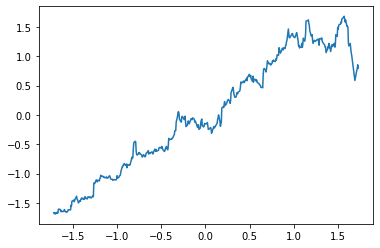

In [169]:
plt.plot(Date_train[:,0], Price_train[:,0])
plt.show()

In [84]:
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(Date)

In [93]:
"""def get_basic_model():
    model = tf.keras.Sequential([normalizer,
                                 tf.keras.layers.Dense(10, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='relu'),
                                 tf.keras.layers.Dense(1)])
    
    
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model"""

"def get_basic_model():\n    model = tf.keras.Sequential([normalizer,\n                                 tf.keras.layers.Dense(10, activation='relu'),\n                                 tf.keras.layers.Dense(10, activation='relu'),\n                                 tf.keras.layers.Dense(1)])\n    \n    \n    model.compile(optimizer='adam',\n                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),\n                metrics=['accuracy'])\n    return model"

In [95]:
#model = get_basic_model()

In [205]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape = (1,1)))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [206]:
#model.weights

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [207]:
model.fit(Date_train, Price_train)

15/15 [==============================] - 1s 1ms/step - loss: 0.4435 - accuracy: 0.0000e+00


In [117]:
#Price_test = test_dataset[: , 1].reshape(-1,1)
#Date_test = test_dataset[:, 0].reshape(-1,1)

In [208]:
Price_test = test_dataset.loc[:,"Close Price"]#.reshape(-1,1)
Date_test = test_dataset.loc[:,"Date Value"]#.reshape(-1,1)

Price_test = np.array(Price_test)
Price_test = Price_test[:, np.newaxis]
Date_test = np.array(Date_test)
Date_test = Date_test[:, np.newaxis]


In [209]:
scalar_price_test = sk.StandardScaler().fit(np.array(Price_test))
Price_test = scalar_price_test.transform(Price_test)
scalar_date_test = sk.StandardScaler().fit(np.array(Date_test))
Date_test = scalar_date_test.transform(Date_test)

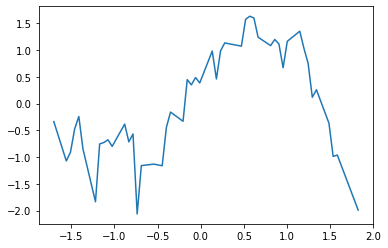

In [210]:
plt.plot(Date_test[:,0], Price_test[:,0])
plt.show()

In [202]:
#Date_test


In [211]:
Price_predicted_scaled = model.predict(Date_test)

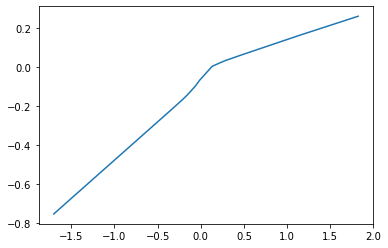

In [212]:
plt.plot(Date_test[:,0], Price_predicted_scaled[:,0])
plt.show()

In [203]:
#price_predicted# = scalar_price_test.inverse_transform(Price_predicted_scaled)

In [214]:
#Price_predicted, scalar_price_test.inverse_transform(Price_test)

In [130]:
Price_predicted.mean()

0.038733486

In [131]:
Price_predicted.std()

0.2563189

In [128]:
#Price_predicted

In [132]:
#Final_Price = sk.StandardScaler.inverse_transform(Price_predicted)

In [136]:
#Price_predicted

In [135]:
#Price_test

In [9]:
plot = mp.pyplot.bar(data_set["Average Price"], data_set["Date"])

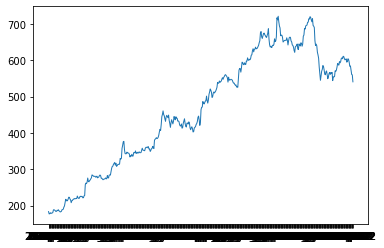

In [9]:
x = data_set["Average Price"]
y = data_set["Date"]

ax = plt.subplot()

ax.plot(y,x, linewidth = 1.0)

ax.boxplot()

plt.show()

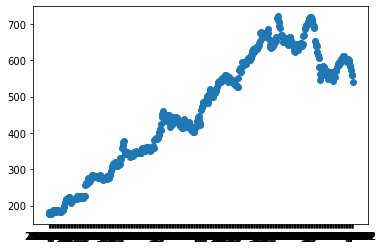

In [13]:
ax1 = plt.subplot()
ax1.scatter(y,x)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()